## **Abstract**

Proiectul a vizat clasificarea calitƒÉ»õii vinului utiliz√¢nd algoritmii **Ridge Classifier, XGBoost**, dar »ôi o re»õea neuronalƒÉ **MLP (Multilayer Perceptron)** asupra caracteristicilor fizico-chimici. Setul de date a inclus 4.899 de probe de vin alb, cu variabile precum aciditate fixƒÉ »ôi volatilƒÉ, acid citric, zahƒÉr rezidual, cloruri, dioxid de sulf, densitate, pH, sulfa»õi »ôi alcool. Calitatea a fost etichetatƒÉ √Æn trei categorii: **low (3‚Äì4)**, **medium (5‚Äì6)** »ôi **high (7‚Äì8-9)**. Datele au fost √ÆmpƒÉr»õite 70% pentru antrenare, 10% evaluare »ôi 20% pentru testare.


# **RidgeClassifier**



**Ridge Classifier** a fost ales pentru capacitatea de **regularizare L2**, **penaliz√¢nd coeficien»õii mari »ôi reduc√¢nd varian»õa estimƒÉrilor**, ceea ce stabilizeazƒÉ modelul, prevenind overfitt-ul, dar »ôi gestionarea a corela»õiilor dintre variabile. De asemenea, calitatea vinului a fost etichetatƒÉ ca **low**, **medium** »ôi **high**, iar RidgeClassifier func»õioneazƒÉ bine pentru probleme de **clasificare mult-clasƒÉ »ôi poate fi eficient ca o extensie a regresiei liniar-penalizate**.


Modelul final a demonstrat cƒÉ proprietƒÉ»õile fizico-chimice pot prezice eficient nivelul calitƒÉ»õii vinului.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

In [2]:
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_df = pd.read_csv(white_url, sep=";")
print("White wine shape:", white_df.shape)
print(white_df.head())

White wine shape: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5   

In [3]:
print("Valori lipsƒÉ pe coloanƒÉ:\n", white_df.isnull().sum())
print("NumƒÉr r√¢nduri duplicate:", white_df.duplicated().sum())

Valori lipsƒÉ pe coloanƒÉ:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
NumƒÉr r√¢nduri duplicate: 937


In [4]:
white_df = white_df.drop_duplicates()

In [5]:
# Split √Æn train/test (80/20)
train_white, test_white = train_test_split(
    white_df,
    test_size=0.2,
    random_state=42,
    stratify=white_df["quality"]
)

# VerificƒÉm dimensiuni
print("Train shape:", train_white.shape)
print("Test shape:", test_white.shape)

# Distribu»õia etichetelor
print("Train distribution:\n", train_white["quality"].value_counts().sort_index())
print("Test distribution:\n", test_white["quality"].value_counts().sort_index())

Train shape: (3168, 12)
Test shape: (793, 12)
Train distribution:
 quality
3      16
4     122
5     940
6    1430
7     551
8     105
9       4
Name: count, dtype: int64
Test distribution:
 quality
3      4
4     31
5    235
6    358
7    138
8     26
9      1
Name: count, dtype: int64


In [6]:
def map_quality(q):
    if q in [3, 4]:
        return "low"
    elif q in [5, 6]:
        return "medium"
    else:
        return "high"

In [7]:
train_white["quality_group"] = train_white["quality"].apply(map_quality)
test_white["quality_group"] = test_white["quality"].apply(map_quality)
print("Distribu»õie train:")
print(train_white["quality_group"].value_counts())
print("\nDistribu»õie test:")
print(test_white["quality_group"].value_counts())

Distribu»õie train:
quality_group
medium    2370
high       660
low        138
Name: count, dtype: int64

Distribu»õie test:
quality_group
medium    593
high      165
low        35
Name: count, dtype: int64


In [8]:
X_train = train_white.drop(["quality", "quality_group"], axis=1)
y_train = train_white["quality_group"]

X_test = test_white.drop(["quality", "quality_group"], axis=1)
y_test = test_white["quality_group"]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Baseline model**

In [9]:
model = RidgeClassifier(alpha=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului RidgeClassifier pe grupuri: 77.43%

Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.22      0.33       165
         low       0.00      0.00      0.00        35
      medium       0.78      0.97      0.87       593

    accuracy                           0.77       793
   macro avg       0.49      0.40      0.40       793
weighted avg       0.73      0.77      0.72       793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acurate»õea modelului RidgeClassifier pe grupuri: 77.43%

Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.22      0.33       165
         low       0.00      0.00      0.00        35
      medium       0.78      0.97      0.87       593

    accuracy                            0.77       793
    macro avg       0.49      0.40      0.40       793
    weighted avg    0.73      0.77      0.72       793

    Modelul tinde sƒÉ ghiceascƒÉ clasa majoritarƒÉ corect, dar ignorƒÉ complet celelalte douƒÉ clase.

    Clasa medium: Recall: 0.97: aproape toate instan»õele de medium au fost corect prezise.
    Precision: 0.78: dintre predic»õiile medium, majoritatea este corectƒÉ.
    Modelul este extrem de √Ænclinat spre clasa medium.

    Clasa high: Recall: 0.22: doar 22% din vinurile high au fost corect identificate.
    Precision: 0.71: c√¢nd modelul spune high, are »ôanse decente sƒÉ fie corect.
    Modelul confundƒÉ multe vinuri high cu medium.

    Clasa low: To»õi indicatorii sunt 0.00: modelul nu a prezis deloc aceastƒÉ clasƒÉ,
    ceea ce scade semnnificativ valoarea practicƒÉ a modelului.

    ObservƒÉm dezechilibru √Æntre clase(medium are 593 de exemple √Æn setul de test, iar low are 35).



**Confusion Matrix**

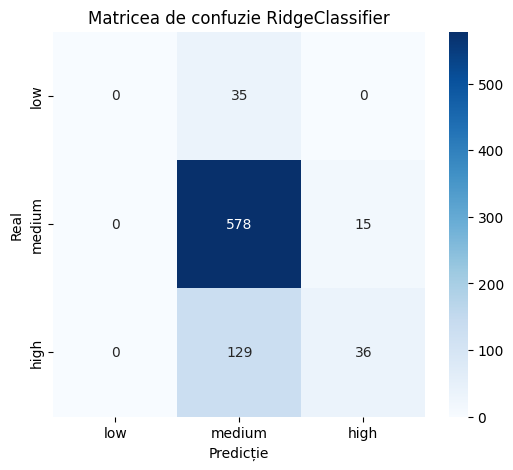

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["low", "medium", "high"],
    yticklabels=["low", "medium", "high"]
)
plt.xlabel("Predic»õie")
plt.ylabel("Real")
plt.title("Matricea de confuzie RidgeClassifier")
plt.show()



R√¢nduri (axe verticale): Clasele reale (ground truth). Coloane (axe orizontale): Clasele prezise de model. Valorile din interior sunt numƒÉrul de instan»õe clasificate √Æn acel mod.

Clasa low:
0 au fost prezise corect ca low, 35 au fost prezise gre»ôit ca medium, 0 au fost prezise ca high.

Clasa medium: 578 au fost prezise corect ca medium, 15 au fost prezise gre»ôit ca high, 0 au fost prezise ca low.

Clasa high: 36 au fost prezise corect ca high, 129 au fost gre»ôit clasificate ca medium, 0 au fost clasificate ca low.


**ROC_AUC Score**

In [11]:
# sklearn.preprocessing import label_binarize and sklearn.metrics import roc_auc_score au fost importate.
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print(f"ROC AUC Score (macro-average, OVR): {roc_auc:.4f}")

ROC AUC Score (macro-average, OVR): 0.5582


ROC = Receiver Operating Characteristic

AUC = Area Under the Curve

Curba ROC reprezintƒÉ: Rata de AdevƒÉrate Pozitive (TPR) (recall) √Æn func»õie de Rata de Fals Pozitive (FPR) pentru diferite praguri de decizie.

Aceasta mƒÉsoarƒÉ c√¢t de bine poate modelul sƒÉ distingƒÉ √Æntre clase ‚Äì adicƒÉ c√¢t de bine sunt separabile predic»õiile.

AUC este un scor cuprins √Æntre 0 »ôi 1.

Scorul ROC AUC (macro-medie, OVR): 0.5582.

Rezultatul aratƒÉ cƒÉ modelul este mai bun dec√¢t o ghicire aleatoare.

**Matthews Correlation Coefficient (MCC)**

In [12]:
# sklearn.metrics import matthews_corrcoef a fost importat.
mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {mcc:.4f}")

MCC: 0.2805


Spre deosebire de acurate»õe, MCC **»õine cont de toate valorile din matricea de confuzie: TP, TN, FP, FN** pentru toate clasele, nu pune accent pe clasa majoritarƒÉ, deci este util √Æn clasele dezechilibrate »ôi oferƒÉ un scor unic care reflectƒÉ calitatea generalƒÉ a predic»õiei.

Modelul este oarecum mai bun dec√¢t o ghicire aleatoare, dar nu este foarte fiabil. ExistƒÉ o corela»õie moderatƒÉ √Æntre etichetele prezise »ôi cele reale.

Performan»õa este afectatƒÉ √Æn special de: recall = 0 pentru clasa low »ôi numeroase clasificƒÉri gre»ôite √Æntre clasele high »ôi medium.

# **Model Optimization**

In [13]:
model = RidgeClassifier(alpha=5.0, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului RidgeClassifier pe grupuri: 77.55%

Classification Report:
              precision    recall  f1-score   support

        high       0.72      0.22      0.33       165
         low       0.00      0.00      0.00        35
      medium       0.78      0.98      0.87       593

    accuracy                           0.78       793
   macro avg       0.50      0.40      0.40       793
weighted avg       0.73      0.78      0.72       793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
model = RidgeClassifier(alpha=5.0, random_state=42, max_iter=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului RidgeClassifier pe grupuri: 77.55%

Classification Report:
              precision    recall  f1-score   support

        high       0.72      0.22      0.33       165
         low       0.00      0.00      0.00        35
      medium       0.78      0.98      0.87       593

    accuracy                           0.78       793
   macro avg       0.50      0.40      0.40       793
weighted avg       0.73      0.78      0.72       793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
model = RidgeClassifier(alpha=5.0, random_state=42, class_weight="balanced")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului RidgeClassifier pe grupuri: 53.47%

Classification Report:
              precision    recall  f1-score   support

        high       0.41      0.82      0.55       165
         low       0.13      0.66      0.22        35
      medium       0.91      0.45      0.60       593

    accuracy                           0.53       793
   macro avg       0.48      0.64      0.46       793
weighted avg       0.77      0.53      0.57       793



In [16]:
model = RidgeClassifier(alpha=20.0, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului RidgeClassifier pe grupuri: 77.55%

Classification Report:
              precision    recall  f1-score   support

        high       0.73      0.21      0.33       165
         low       0.00      0.00      0.00        35
      medium       0.78      0.98      0.87       593

    accuracy                           0.78       793
   macro avg       0.50      0.40      0.40       793
weighted avg       0.73      0.78      0.72       793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
model = RidgeClassifier(alpha=5.0, random_state=42, solver="sag")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului RidgeClassifier pe grupuri: 77.55%

Classification Report:
              precision    recall  f1-score   support

        high       0.72      0.22      0.33       165
         low       0.00      0.00      0.00        35
      medium       0.78      0.98      0.87       593

    accuracy                           0.78       793
   macro avg       0.50      0.40      0.40       793
weighted avg       0.73      0.78      0.72       793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**ADASYN Model**

In [18]:
from imblearn.over_sampling import ADASYN

# ADASYN (Suprasampling utiliz√¢nd algoritmul Adaptive Synthetic)
AceastƒÉ metodƒÉ este similarƒÉ cu SMOTE, dar **genereazƒÉ un numƒÉr diferit de exemple sintetice √Æn func»õie de o estimare a distribu»õiei locale a clasei care trebuie suprasamplatƒÉ**.

n_neighbors (int sau obiect estimator, implicit=5): numƒÉrul de vecini apropia»õi folosi»õi pentru a defini vecinƒÉtatea e»ôantioanelor utilizate √Æn generarea noilor exemple sintetice.

sampling_strategy (float, str, dict sau callable, implicit=‚Äôauto‚Äô). Informa»õii despre modul de resampling al setului de date:
##### ‚Ä¢	'minority': resampleazƒÉ doar clasa minoritarƒÉ;
##### ‚Ä¢	'not minority': resampleazƒÉ toate clasele cu excep»õia clasei minoritare;
##### ‚Ä¢	'not majority': resampleazƒÉ toate clasele cu excep»õia clasei majoritare;
##### ‚Ä¢	'all': resampleazƒÉ toate clasele;
##### ‚Ä¢	'auto': echivalent cu 'not majority'.


In [19]:
adasyn = ADASYN(random_state=42, sampling_strategy="minority", n_neighbors=7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# VerificƒÉm distribu»õia dupƒÉ resampling
print("\nDistribu»õie dupƒÉ ADASYN:")
print(collections.Counter(y_train_resampled))


Distribu»õie dupƒÉ ADASYN:
Counter({'medium': 2370, 'low': 2341, 'high': 660})


In [20]:
model = RidgeClassifier(alpha=5.0, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier cu ADASYN: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Acurate»õea modelului RidgeClassifier cu ADASYN: 60.28%

Classification Report:
              precision    recall  f1-score   support

        high       0.80      0.12      0.21       165
         low       0.12      0.69      0.21        35
      medium       0.76      0.73      0.75       593

    accuracy                           0.60       793
   macro avg       0.56      0.51      0.39       793
weighted avg       0.74      0.60      0.61       793



Clasa high: Precizie mare (0.80): atunci c√¢nd modelul prezice high, de obicei are dreptate. Recall foarte scƒÉzut (0.12): majoritatea vinurilor de calitate high nu este detectatƒÉ. Modelul este foarte precaut √Æn a prezice clasa high.

Clasa medium: Precizie »ôi recall rezonabile (~0.75 fiecare). RƒÉm√¢ne cea mai stabilƒÉ clasƒÉ, dar nu mai este dominantƒÉ ca √Ænainte de aplicarea ADASYN.

Clasa low: Precizie scƒÉzutƒÉ (0.12): multe dintre predic»õiile pentru low sunt incorecte. Recall mare (0.69): majoritatea probelor reale low sunt detectate.



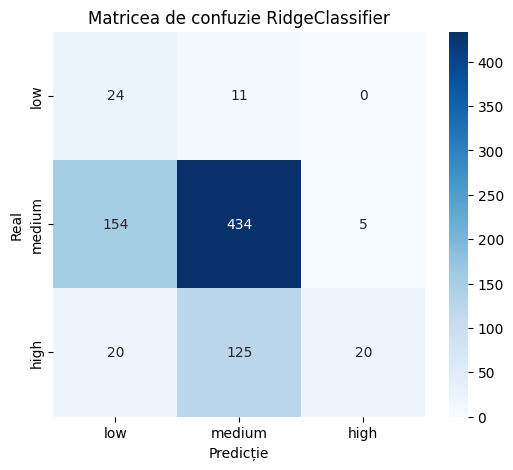

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["low", "medium", "high"],
    yticklabels=["low", "medium", "high"]
)
plt.xlabel("Predic»õie")
plt.ylabel("Real")
plt.title("Matricea de confuzie RidgeClassifier")
plt.show()



In [22]:
# sklearn.preprocessing import label_binarize and sklearn.metrics import roc_auc_score au fost importate.
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print(f"ROC AUC Score (macro-average, OVR): {roc_auc:.4f}")

ROC AUC Score (macro-average, OVR): 0.6035


ROC_AUC Score se √ÆmbunƒÉ»õƒÉte»ôte dupa adƒÉugarea de exemple √Æn clasele minoritare.

In [23]:
adasyn = ADASYN(random_state=42, sampling_strategy="all", n_neighbors=7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# VerificƒÉm distribu»õia dupƒÉ resampling
print("\nDistribu»õie dupƒÉ ADASYN:")
print(collections.Counter(y_train_resampled))


Distribu»õie dupƒÉ ADASYN:
Counter({'high': 2383, 'medium': 2370, 'low': 2341})


In [24]:
model = RidgeClassifier(alpha=5.0, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului RidgeClassifier cu ADASYN: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Acurate»õea modelului RidgeClassifier cu ADASYN: 49.43%

Classification Report:
              precision    recall  f1-score   support

        high       0.39      0.82      0.53       165
         low       0.12      0.63      0.20        35
      medium       0.90      0.39      0.55       593

    accuracy                           0.49       793
   macro avg       0.47      0.62      0.43       793
weighted avg       0.76      0.49      0.53       793



# XGBoost

**XGBoost** face parte din familia algoritmilor de tip **boosting**, care sunt tehnici de √ÆnvƒÉ»õare prin asamblare ce **combinƒÉ predic»õiile mai multor √ÆnvƒÉ»õƒÉtori slabi**. Acesta construie»ôte arbori de decizie **secven»õial/iterativ**, fiecare arbore nou **corect√¢nd erorile fƒÉcute de arborii anteriori**, iar modelul final este **un asamblu de √ÆnvƒÉ»õƒÉtori slabi** (arbori de decizie) combina»õi **pentru a forma un predictor puternic**.
Se fac **regularizƒÉrile L1 »ôi L2** pentru a face modelul **mai bun √Æmpotriva overfitting-ului**. XGBoost umple automat valorile lipsƒÉ. Pentru a decide cum sƒÉ construiascƒÉ fiecare arbore, **XGBoost utilizeazƒÉ o aproximare de ordinul 2 a func»õiei de pierdere (loss), care implicƒÉ at√¢t gradientul (derivate de ordinul 1), c√¢t »ôi hessianul (derivate de ordinul 2)**. AceastƒÉ abordare permite modelului **sƒÉ evalueze direc»õia √Æn care trebuie ajustate predic»õiile (prin gradient), dar »ôi c√¢tƒÉ √Æncredere sƒÉ aibƒÉ √Æn aceste ajustƒÉri (prin hessian)**, contribuind la o convergen»õƒÉ mai rapidƒÉ »ôi mai stabilƒÉ a modelului.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [26]:
# Split √Æn 70% train, 10% val, 20% test
train_val_df, test_df = train_test_split(
    white_df,
    test_size=0.2,
    random_state=42,
    stratify=white_df["quality"]
)

train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.125,
    random_state=42,
    stratify=train_val_df["quality"]
)

In [27]:
def map_quality(q):
    if q in [3, 4]:
        return "low"
    elif q in [5, 6]:
        return "medium"
    else:
        return "high"

for df in [train_df, val_df, test_df]:
    df["quality_group"] = df["quality"].apply(map_quality)


# **Baseline model**

In [28]:
X_train = train_df.drop(["quality", "quality_group"], axis=1)
y_train = train_df["quality_group"]

X_val = val_df.drop(["quality", "quality_group"], axis=1)
y_val = val_df["quality_group"]

X_test = test_df.drop(["quality", "quality_group"], axis=1)
y_test = test_df["quality_group"]


In [29]:
le = LabelEncoder() # pentru a converti etichetele low, medium »ôi high √Æn 0, 1 »ôi 2.
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
#!pip install --upgrade xgboost
import xgboost
print(xgboost.__version__)
print("XGBClassifier path:", XGBClassifier.__module__)
#help(XGBClassifier.fit)

3.0.2
XGBClassifier path: xgboost.sklearn


In [31]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=1.0,
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    min_child_weight=1
)


In [32]:

model.set_params(early_stopping_rounds=10)
model.fit(
    X_train_scaled,
    y_train_enc,
    eval_set=[(X_train_scaled, y_train_enc), (X_val_scaled, y_val_enc)],
    verbose=True
)

[0]	validation_0-mlogloss:1.01143	validation_1-mlogloss:1.02021
[1]	validation_0-mlogloss:0.93622	validation_1-mlogloss:0.95506
[2]	validation_0-mlogloss:0.87022	validation_1-mlogloss:0.89988
[3]	validation_0-mlogloss:0.81256	validation_1-mlogloss:0.85309
[4]	validation_0-mlogloss:0.76296	validation_1-mlogloss:0.81105
[5]	validation_0-mlogloss:0.71894	validation_1-mlogloss:0.77516
[6]	validation_0-mlogloss:0.67990	validation_1-mlogloss:0.74462
[7]	validation_0-mlogloss:0.64556	validation_1-mlogloss:0.71828
[8]	validation_0-mlogloss:0.61318	validation_1-mlogloss:0.69487
[9]	validation_0-mlogloss:0.58441	validation_1-mlogloss:0.67507
[10]	validation_0-mlogloss:0.55922	validation_1-mlogloss:0.65653
[11]	validation_0-mlogloss:0.53549	validation_1-mlogloss:0.63972
[12]	validation_0-mlogloss:0.51426	validation_1-mlogloss:0.62490
[13]	validation_0-mlogloss:0.49445	validation_1-mlogloss:0.61277
[14]	validation_0-mlogloss:0.47641	validation_1-mlogloss:0.60026
[15]	validation_0-mlogloss:0.45965	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=3, ...)

In [33]:
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# === Evaluare
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului XGBoost cu early stopping: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acurate»õea modelului XGBoost cu early stopping: 77.18%

Classification Report:
              precision    recall  f1-score   support

        high       0.60      0.38      0.46       165
         low       0.29      0.06      0.10        35
      medium       0.80      0.92      0.86       593

    accuracy                           0.77       793
   macro avg       0.56      0.45      0.47       793
weighted avg       0.74      0.77      0.74       793



Din cele 793 de exemple din setul de test:

Aproximativ 612 au fost clasificate corect. Acurate»õea este bunƒÉ, dar nu suficientƒÉ pentru a evalua corect un model √Æn cazul unui dezechilibru √Æntre clase, cum este cazul aici.

Clasa high: precision = 0.60: 60% dintre predic»õiile "high" au fost corecte.recall = 0.38: doar 38% din exemplele "high" au fost recunoscute corect.

Clasa medium: precision = 0.80: 80% dintre predic»õiile "medium" au fost corecte.
recall = 0.92: 92% din toate instan»õele "medium" au fost recunoscute corect.
f1-score = 0.86: scor foarte bun, modelul √Ænva»õƒÉ bine clasa aceasta.

Clasa low: precision = 0.29: 29% dintre predic»õiile "low" au fost corecte. recall = 0.06: doar 6% dintre exemplele reale low au fost recunoscute, f1-score foarte slab (0.10).

Macro avg: media simplƒÉ √Æntre clase, tratate egal (utilƒÉ c√¢nd clasele sunt dezechilibrate). Macro avg = scƒÉzut, semn cƒÉ modelul nu generalizeazƒÉ bine pe toate clasele.

Weighted avg: »õine cont de mƒÉrimea fiecƒÉrei clase, dominatƒÉ de medium. Weighted avg = √Ænalt, dar mascheazƒÉ performan»õa slabƒÉ pe clasele mici.

**Confusion Matrix**

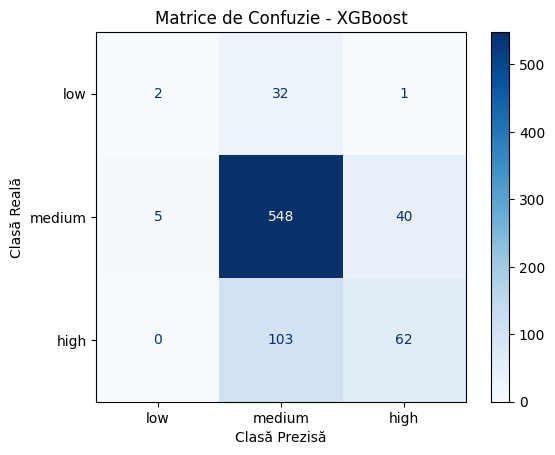

In [34]:
ordered_labels = ['low', 'medium', 'high']
cm = confusion_matrix(y_test, y_pred, labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matrice de Confuzie - XGBoost")
plt.xlabel("ClasƒÉ PrezisƒÉ")
plt.ylabel("ClasƒÉ RealƒÉ")
plt.grid(False)
plt.show()

**ROC_AUC Score**

In [35]:
#sklearn.metrics import roc_auc_score »ôi sklearn.preprocessing import label_binarize au fost importate
y_proba = model.predict_proba(X_test_scaled)

classes = ['low', 'medium', 'high']
y_test_bin = label_binarize(y_test, classes=classes)

roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')

print(f"ROC AUC (OvR, macro average): {roc_auc:.4f}")

ROC AUC (OvR, macro average): 0.3289


Un scor de 0.3289 este sub 0.5, ceea ce sugereazƒÉ cƒÉ:

Modelul nu produce probabilitƒÉ»õi bine calibrate. Nu distinge clar √Æntre clasele low, medium, high. Ar putea fi supraspecializat pe clasa medium (cea dominantƒÉ), ignor√¢nd low »ôi high. Modelul suferƒÉ de dezechilibru √Æntre clase, ceea ce afecteazƒÉ scorul ROC AUC.

Acurate»õea este ~77%, dar ROC AUC e 0.33 ceea ce semnaleazƒÉ un model dezechilibrat care poate prezice doar bine clasa majoritarƒÉ (medium), dar slab celelalte.

**Matthews Correlation Coefficient (MCC)**

In [36]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.3246


Valoarea este peste 0, deci modelul face mai bine dec√¢t o clasificare aleatorie. Dar nu depƒÉ»ôe»ôte pragul de 0.5, ceea ce sugereazƒÉ cƒÉ modelul are performan»õƒÉ modestƒÉ, reu»ôe»ôte par»õial sƒÉ distingƒÉ clasele (low, medium, high), dar gre»ôe»ôte frecvent, mai ales la clasele minoritare (low »ôi high). Probabil este puternic influen»õat de clasa majoritarƒÉ medium.





# **Model Optimization**

In [37]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=1.0,
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='merror',
    verbosity=0,
    min_child_weight=1
)
model.set_params(early_stopping_rounds=10)
model.fit(
    X_train_scaled,
    y_train_enc,
    eval_set=[(X_train_scaled, y_train_enc), (X_val_scaled, y_val_enc)],
    verbose=True
)
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# === Evaluare
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului XGBoost cu early stopping: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[0]	validation_0-merror:0.16198	validation_1-merror:0.21465
[1]	validation_0-merror:0.15476	validation_1-merror:0.21465
[2]	validation_0-merror:0.14755	validation_1-merror:0.22222
[3]	validation_0-merror:0.14105	validation_1-merror:0.23232
[4]	validation_0-merror:0.13528	validation_1-merror:0.22727
[5]	validation_0-merror:0.13456	validation_1-merror:0.22475
[6]	validation_0-merror:0.13203	validation_1-merror:0.22222
[7]	validation_0-merror:0.13167	validation_1-merror:0.21717
[8]	validation_0-merror:0.12843	validation_1-merror:0.21970
[9]	validation_0-merror:0.12626	validation_1-merror:0.22475
[10]	validation_0-merror:0.12590	validation_1-merror:0.22727

Acurate»õea modelului XGBoost cu early stopping: 75.79%

Classification Report:
              precision    recall  f1-score   support

        high       0.54      0.36      0.43       165
         low       0.20      0.03      0.05        35
      medium       0.80      0.91      0.85       593

    accuracy                           0

In [38]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=1.0,
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    min_child_weight=1
)
model.set_params(early_stopping_rounds=10)
model.fit(
    X_train_scaled,
    y_train_enc,
    eval_set=[(X_train_scaled, y_train_enc), (X_val_scaled, y_val_enc)],
    verbose=True
)
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# === Evaluare
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului XGBoost cu early stopping: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[0]	validation_0-mlogloss:1.01143	validation_1-mlogloss:1.02021
[1]	validation_0-mlogloss:0.93622	validation_1-mlogloss:0.95506
[2]	validation_0-mlogloss:0.87022	validation_1-mlogloss:0.89988
[3]	validation_0-mlogloss:0.81256	validation_1-mlogloss:0.85309
[4]	validation_0-mlogloss:0.76296	validation_1-mlogloss:0.81105
[5]	validation_0-mlogloss:0.71894	validation_1-mlogloss:0.77516
[6]	validation_0-mlogloss:0.67990	validation_1-mlogloss:0.74462
[7]	validation_0-mlogloss:0.64556	validation_1-mlogloss:0.71828
[8]	validation_0-mlogloss:0.61318	validation_1-mlogloss:0.69487
[9]	validation_0-mlogloss:0.58441	validation_1-mlogloss:0.67507
[10]	validation_0-mlogloss:0.55922	validation_1-mlogloss:0.65653
[11]	validation_0-mlogloss:0.53549	validation_1-mlogloss:0.63972
[12]	validation_0-mlogloss:0.51426	validation_1-mlogloss:0.62490
[13]	validation_0-mlogloss:0.49445	validation_1-mlogloss:0.61277
[14]	validation_0-mlogloss:0.47641	validation_1-mlogloss:0.60026
[15]	validation_0-mlogloss:0.45965	

In [39]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    min_child_weight=1
)
model.set_params(early_stopping_rounds=10)
model.fit(
    X_train_scaled,
    y_train_enc,
    eval_set=[(X_train_scaled, y_train_enc), (X_val_scaled, y_val_enc)],
    verbose=True
)
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# === Evaluare
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului XGBoost cu early stopping: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[0]	validation_0-mlogloss:1.01288	validation_1-mlogloss:1.02230
[1]	validation_0-mlogloss:0.93890	validation_1-mlogloss:0.96005
[2]	validation_0-mlogloss:0.87334	validation_1-mlogloss:0.90420
[3]	validation_0-mlogloss:0.81767	validation_1-mlogloss:0.85811
[4]	validation_0-mlogloss:0.76834	validation_1-mlogloss:0.81540
[5]	validation_0-mlogloss:0.72527	validation_1-mlogloss:0.78052
[6]	validation_0-mlogloss:0.68627	validation_1-mlogloss:0.74926
[7]	validation_0-mlogloss:0.65124	validation_1-mlogloss:0.72247
[8]	validation_0-mlogloss:0.61924	validation_1-mlogloss:0.69740
[9]	validation_0-mlogloss:0.58892	validation_1-mlogloss:0.67503
[10]	validation_0-mlogloss:0.56287	validation_1-mlogloss:0.65774
[11]	validation_0-mlogloss:0.53916	validation_1-mlogloss:0.64055
[12]	validation_0-mlogloss:0.51800	validation_1-mlogloss:0.62476
[13]	validation_0-mlogloss:0.49854	validation_1-mlogloss:0.61159
[14]	validation_0-mlogloss:0.47892	validation_1-mlogloss:0.59927
[15]	validation_0-mlogloss:0.46235	

Varianta de mai sus a performat mai bine dec√¢t modelul de bazƒÉ.

In [40]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=12,
    subsample=0.8,
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    min_child_weight=3
)
model.set_params(early_stopping_rounds=10)
model.fit(
    X_train_scaled,
    y_train_enc,
    eval_set=[(X_train_scaled, y_train_enc), (X_val_scaled, y_val_enc)],
    verbose=True
)
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# === Evaluare
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului XGBoost cu early stopping: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[0]	validation_0-mlogloss:1.00860	validation_1-mlogloss:1.02331
[1]	validation_0-mlogloss:0.92954	validation_1-mlogloss:0.95751
[2]	validation_0-mlogloss:0.86059	validation_1-mlogloss:0.90376
[3]	validation_0-mlogloss:0.79929	validation_1-mlogloss:0.85730
[4]	validation_0-mlogloss:0.74486	validation_1-mlogloss:0.81716
[5]	validation_0-mlogloss:0.69735	validation_1-mlogloss:0.78120
[6]	validation_0-mlogloss:0.65396	validation_1-mlogloss:0.75206
[7]	validation_0-mlogloss:0.61482	validation_1-mlogloss:0.72597
[8]	validation_0-mlogloss:0.58069	validation_1-mlogloss:0.69970
[9]	validation_0-mlogloss:0.54898	validation_1-mlogloss:0.67895
[10]	validation_0-mlogloss:0.52009	validation_1-mlogloss:0.66080
[11]	validation_0-mlogloss:0.49379	validation_1-mlogloss:0.64458
[12]	validation_0-mlogloss:0.46983	validation_1-mlogloss:0.63011
[13]	validation_0-mlogloss:0.44755	validation_1-mlogloss:0.61738
[14]	validation_0-mlogloss:0.42646	validation_1-mlogloss:0.60715
[15]	validation_0-mlogloss:0.40733	

AceastƒÉ √Æncercare a performat mai bine dec√¢t modelul de bazƒÉ.

# **AdƒÉugare ADASYN**

In [41]:
adasyn = ADASYN(random_state=42, sampling_strategy="minority", n_neighbors=10)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train_enc)

# === Model
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    min_child_weight=1
)

model.set_params(early_stopping_rounds=10)

model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=[(X_train_scaled, y_train_enc), (X_val_scaled, y_val_enc)],
    verbose=True
)

# === Predic»õie »ôi evaluare
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului XGBoost cu early stopping »ôi ADASYN: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[0]	validation_0-mlogloss:1.04085	validation_1-mlogloss:1.05663
[1]	validation_0-mlogloss:0.98589	validation_1-mlogloss:1.01609
[2]	validation_0-mlogloss:0.93900	validation_1-mlogloss:0.97893
[3]	validation_0-mlogloss:0.89573	validation_1-mlogloss:0.94628
[4]	validation_0-mlogloss:0.85706	validation_1-mlogloss:0.91753
[5]	validation_0-mlogloss:0.82090	validation_1-mlogloss:0.88903
[6]	validation_0-mlogloss:0.79020	validation_1-mlogloss:0.86905
[7]	validation_0-mlogloss:0.76222	validation_1-mlogloss:0.84802
[8]	validation_0-mlogloss:0.73794	validation_1-mlogloss:0.83263
[9]	validation_0-mlogloss:0.71228	validation_1-mlogloss:0.81600
[10]	validation_0-mlogloss:0.68782	validation_1-mlogloss:0.80146
[11]	validation_0-mlogloss:0.66542	validation_1-mlogloss:0.78519
[12]	validation_0-mlogloss:0.64606	validation_1-mlogloss:0.77185
[13]	validation_0-mlogloss:0.62660	validation_1-mlogloss:0.75902
[14]	validation_0-mlogloss:0.60764	validation_1-mlogloss:0.74603
[15]	validation_0-mlogloss:0.59225	

Clasa low a ob»õinut √ÆmbunƒÉ»õiri, f1-score a crescut semnificativ, de la 0.1 la 0.3.

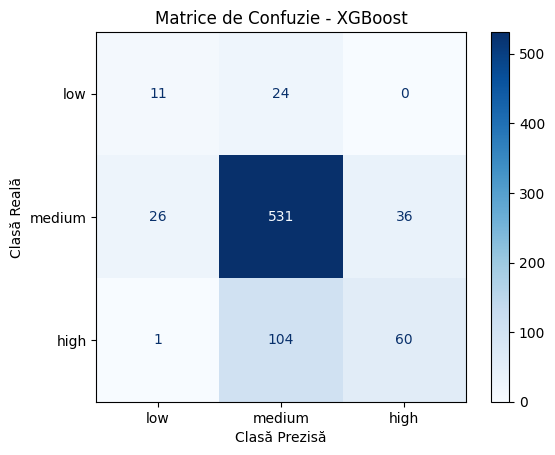

In [42]:
ordered_labels = ['low', 'medium', 'high']
cm = confusion_matrix(y_test, y_pred, labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matrice de Confuzie - XGBoost")
plt.xlabel("ClasƒÉ PrezisƒÉ")
plt.ylabel("ClasƒÉ RealƒÉ")
plt.grid(False)
plt.show()

In [43]:
# === ROC AUC (macro)
y_test_bin = label_binarize(y_test, classes=le.classes_)
y_proba = model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print(f"ROC AUC Score (macro-average): {roc_auc:.4f}")

ROC AUC Score (macro-average): 0.8040


Cu 0.8040, modelul are o capacitate foarte bunƒÉ de a distinge √Æntre cele 3 clase (low, medium, high), pe baza probabilitƒÉ»õilor prezise.

Spre deosebire de acurate»õe (care poate fi pƒÉrtinitoare √Æn caz de dezechilibru √Æntre clase), ROC AUC macro: EvalueazƒÉ fiecare clasƒÉ individual (OvR) »ôi reflectƒÉ calitatea scorurilor de √Æncredere ale modelului, nu doar decizia finalƒÉ.

Se afirmƒÉ cƒÉ modelul face o distinc»õie clarƒÉ √Æntre clase »ôi produce scoruri de probabilitate bine calibrate »ôi este o √ÆmbunƒÉtƒÉ»õire clarƒÉ fa»õƒÉ de varianta ini»õialƒÉ (unde ROC AUC era ~0.33).

In [44]:
# === MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.3246


Modelul a beneficiat de ADASYN, scorul MCC a rƒÉmas aproximativ acela»ôi.

# **GridSearch**

In [45]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='merror',
    verbosity=0
)
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1  # folose»ôte toate procesoarele
)

grid_search.fit(X_train_scaled, y_train_enc)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation accuracy: 78.21%


In [46]:
best_model = grid_search.best_estimator_

y_pred_enc = best_model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea pe setul de test: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Acurate»õea pe setul de test: 76.80%

Classification Report:
              precision    recall  f1-score   support

        high       0.59      0.35      0.44       165
         low       0.33      0.06      0.10        35
      medium       0.80      0.93      0.86       593

    accuracy                           0.77       793
   macro avg       0.57      0.44      0.46       793
weighted avg       0.73      0.77      0.74       793



GridSearch nu a contribuit la o √ÆmbunƒÉtƒÉ»õire.

# **MLP (Multilayer Perceptron)**

Se alege **MLP (Multilayer Perceptron)** pentru acest task deoarece **datele sunt tabulare, numerice »ôi fƒÉrƒÉ structurƒÉ secven»õialƒÉ sau spa»õialƒÉ**, caracteristici pentru care MLP-urile sunt foarte bine adaptate. Fiind o **re»õea neuronalƒÉ complet conectatƒÉ**, MLP poate √ÆnvƒÉ»õa rela»õii non-liniare √Æntre caracteristicile vinului »ôi calitatea acestuia (low, medium, high), oferind flexibilitate √Æn modelare »ôi capacitate de generalizare. **Spre deosebire de re»õele precum RNN sau CNN**, care sunt **specializate pentru date secven»õiale sau imagini**, MLP este eficient, u»ôor de antrenat »ôi suficient de puternic pentru sarcini de clasificare multi-clasƒÉ pe seturi de date precum cel utilizat p√¢nƒÉ acum.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
train_val_df, test_df = train_test_split(
    white_df,
    test_size=0.2,
    random_state=42,
    stratify=white_df["quality"]
)

train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.125,
    random_state=42,
    stratify=train_val_df["quality"]
)

In [50]:
def map_quality(q):
    if q in [3, 4]:
        return "low"
    elif q in [5, 6]:
        return "medium"
    else:
        return "high"

for df in [train_df, val_df, test_df]:
    df["quality_group"] = df["quality"].apply(map_quality)

In [51]:
X_train = train_df.drop(["quality", "quality_group"], axis=1)
y_train = train_df["quality_group"]

X_val = val_df.drop(["quality", "quality_group"], axis=1)
y_val = val_df["quality_group"]

X_test = test_df.drop(["quality", "quality_group"], axis=1)
y_test = test_df["quality_group"]

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

y_train_cat = to_categorical(y_train_enc, num_classes=3)
y_val_cat = to_categorical(y_val_enc, num_classes=3)
y_test_cat = to_categorical(y_test_enc, num_classes=3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [52]:
# Definirea modelului MLP
model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.6857 - loss: 0.7583 - val_accuracy: 0.7652 - val_loss: 0.6002
Epoch 2/100
87/87 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.7920 - loss: 0.5547 - val_accuracy: 0.7702 - val_loss: 0.5611
Epoch 3/100
87/87 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.7781 - loss: 0.5588 - val_accuracy: 0.7576 - val_loss: 0.5415
Epoch 4/100
87/87 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.7670 - loss: 0.5605 - val_accuracy: 0.7677 - val_loss: 0.5365
Epoch 5/100
87/87 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.7780 - loss: 0.5251 - val_accuracy: 0.7828 - val_loss: 0.5153
Epoch 6/100
87/87 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.7898 - loss: 0.5298 - val_accuracy: 0.7727 - val_loss: 0.5240
Epoch 7/10

In [53]:
y_pred_proba = model.predict(X_test_scaled)
y_pred_enc = y_pred_proba.argmax(axis=1)
y_pred = le.inverse_transform(y_pred_enc)

accuracy = accuracy_score(y_test, y_pred)
print("\nAcurate»õea modelului MLP: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step

Acurate»õea modelului MLP: 76.42%

Classification Report:
              precision    recall  f1-score   support

        high       0.57      0.43      0.49       165
         low       0.27      0.09      0.13        35
      medium       0.81      0.90      0.85       593

    accuracy                           0.76       793
   macro avg       0.55      0.47      0.49       793
weighted avg       0.74      0.76      0.74       793



Clasa high: Recall de 0.4, o valoare ce √ÆnseamnƒÉ cƒÉ modelul recunoa»ôte exemplele high. Precision de 0.62 √ÆnseamnƒÉ cƒÉ, atunci c√¢nd prezice high, e destul de √ÆncrezƒÉtor, dar nu face asta suficient de des.

Clasa medium: Este clasa majoritarƒÉ, iar modelul o recunoa»ôte cel mai bine.Recall-ul de 0.92 aratƒÉ cƒÉ majoritatea exemplelor medium au fost corect prezise.
Modelul e clar biasat cƒÉtre aceastƒÉ clasƒÉ.

Clasa low: Foarte pu»õine exemple √Æn set, doar 35. Recall-ul de 0.09 este extrem de mic, aproape toate exemplele low sunt gre»ôit clasificate ca altceva.

Asta sugereazƒÉ o clasƒÉ puternic dezechilibratƒÉ.

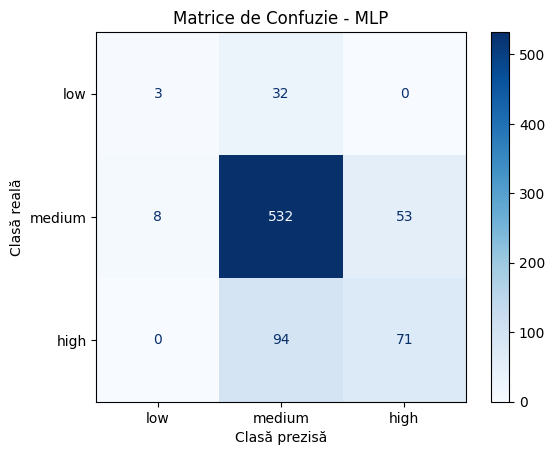

In [54]:
ordered_labels = ['low', 'medium', 'high']
cm = confusion_matrix(y_test, y_pred, labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordered_labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matrice de Confuzie - MLP")
plt.xlabel("ClasƒÉ prezisƒÉ")
plt.ylabel("ClasƒÉ realƒÉ")
plt.grid(False)
plt.show()


Modelul este puternic √Ænclinat spre clasa medium, ceea ce este comun √Æn seturi dezechilibrate. Clasele minoritare low »ôi high sunt predominant clasificate ca medium.

Matricea eviden»õiazƒÉ problema dezechilibrului de clase »ôi faptul cƒÉ modelul nu √Ænva»õƒÉ bine clasele rare.

In [55]:
y_test_bin = label_binarize(y_test, classes=le.classes_)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print(f"ROC AUC Score (macro-average): {roc_auc:.4f}")

ROC AUC Score (macro-average): 0.8246


Se remarcƒÉ o valoare bunƒÉ pentru scorul ROC AUC, apropiatƒÉ de 1, de unde se observƒÉ ca re»õeaua neuronalƒÉ a performat foarte bine »ôi farƒÉ adƒÉugarea ADASYN.

In [56]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.3282


Un rezultat MCC asemƒÉnƒÉtor cu rezultatele ob»õinute la RidgeClassifier »ôi XGBoost, dar cu o u»ôoarƒÉ √ÆmbunƒÉtƒÉ»õire.

## Optimizarea hiperparametrilor re»õelei neuronale

Pentru aceastƒÉ sec»õiune a temei, am ales sƒÉ optimizam hiperparametrii re»õelei neuronale deoarece este un model flexibil, dar sensibil la configura»õia internƒÉ.

Am realizat optimizarea **manualƒÉ/empiricƒÉ** (conform recomandƒÉrilor din curs), prin variarea urmƒÉtorilor hiperparametri:

- **Optimizator**:
  - `Adam` (default) ‚Äì oferƒÉ stabilitate √Æn antrenare;
  - `SGD` cu `nesterov=True` ‚Äì pentru testarea unui optimizator cu momentum.
- **Dropout**:
  - Am testat rate de `0.3` »ôi `0.5` pentru regularizare »ôi prevenirea supra√ÆnvƒÉ»õƒÉrii.
- **ArhitecturƒÉ**:
  - NumƒÉr de neuroni √Æn straturi dense ‚Äì √Æntre 64 »ôi 128, cu straturi fully connected.
- **Func»õia de pierdere**:
  - `categorical_crossentropy`, potrivitƒÉ pentru clasificare multiclasa.
- **Resampling ADASYN**:
  - Am aplicat ADASYN pentru echilibrarea claselor minoritare √Ænainte de antrenare.
  - Am rulat douƒÉ experimente independente »ôi am comparat scorurile ob»õinute.

### Metrici de evaluare folosite:
- Acurate»õe (`accuracy`)
- F1-score (macro »ôi ponderat)
- MCC (Matthews Correlation Coefficient)
- ROC AUC (One-vs-Rest)

√én urma acestor optimizƒÉri, am identificat configura»õii mai echilibrate √Æntre clase, √Æn special √Æn clasificarea exemplelor `low` »ôi `high`, iar aplicarea ADASYN a contribuit semnificativ la aceastƒÉ √ÆmbunƒÉtƒÉ»õire.

Performan»õele ob»õinute sunt comparate √Æn sec»õiunile urmƒÉtoare prin grafice »ôi rapoarte detaliate.


### Echilibrarea setului de date cu ADASYN »ôi preprocesare

Pentru a √ÆmbunƒÉtƒÉ»õi √ÆnvƒÉ»õarea re»õelei neuronale √Æn fa»õa dezechilibrelor de clasƒÉ, folosim **ADASYN** pentru a genera exemple sintetice pentru clasele minoritare.
Apoi normalizƒÉm datele cu StandardScaler »ôi transformƒÉm etichetele √Æntr-un format one-hot, necesar pentru clasificare multi-clasƒÉ cu categorical_crossentropy.


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import ADASYN

# Split: train + val + test
train_val_df, test_df = train_test_split(
    white_df,
    test_size=0.2,
    random_state=42,
    stratify=white_df["quality"]
)

train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.125,  # 0.125 din 0.8 = 0.1 => 10% din total
    random_state=42,
    stratify=train_val_df["quality"]
)


In [58]:
def map_quality(q):
    if q in [3, 4]:
        return "low"
    elif q in [5, 6]:
        return "medium"
    else:
        return "high"

# Apply mapping
for df in [train_df, val_df, test_df]:
    df["quality_group"] = df["quality"].apply(map_quality)


In [59]:
# Split features and labels
X_train = train_df.drop(["quality", "quality_group"], axis=1)
y_train = train_df["quality_group"]

X_val = val_df.drop(["quality", "quality_group"], axis=1)
y_val = val_df["quality_group"]

X_test = test_df.drop(["quality", "quality_group"], axis=1)
y_test = test_df["quality_group"]

# Encode labels numerically: 'low'=0, 'medium'=1, 'high'=2
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train_enc)

# One-hot encode labels (categorical format for Keras)
y_train_cat = to_categorical(y_train_ada, num_classes=3)
y_val_cat = to_categorical(y_val_enc, num_classes=3)
y_test_cat = to_categorical(y_test_enc, num_classes=3)

In [60]:
import collections

print("Distribu»õia etichetelor √Æn y_train √Ænainte de ADASYN:")
print(collections.Counter(y_train_enc))

print("\nDistribu»õia etichetelor √Æn y_train_ada dupƒÉ ADASYN:")
print(collections.Counter(y_train_ada))

Distribu»õia etichetelor √Æn y_train √Ænainte de ADASYN:
Counter({np.int64(2): 2073, np.int64(0): 578, np.int64(1): 121})

Distribu»õia etichetelor √Æn y_train_ada dupƒÉ ADASYN:
Counter({np.int64(0): 2142, np.int64(2): 2073, np.int64(1): 2063})


In [61]:
print("X_train_ada shape:", X_train_ada.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("y_val_cat shape:", y_val_cat.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test_cat shape:", y_test_cat.shape)

X_train_ada shape: (6278, 11)
y_train_cat shape: (6278, 3)
X_val_scaled shape: (396, 11)
y_val_cat shape: (396, 3)
X_test_scaled shape: (793, 11)
y_test_cat shape: (793, 3)


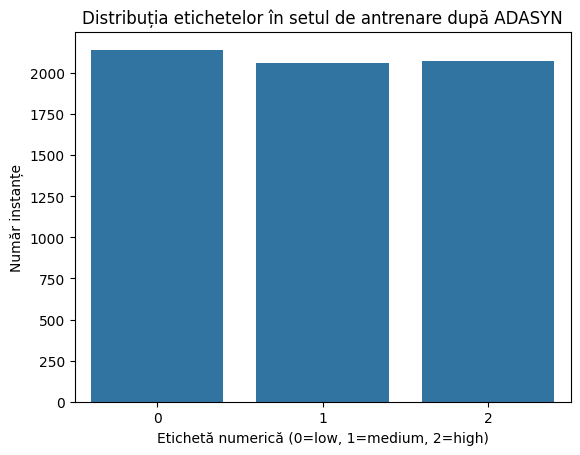

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_ada)
plt.title("Distribu»õia etichetelor √Æn setul de antrenare dupƒÉ ADASYN")
plt.xlabel("EtichetƒÉ numericƒÉ (0=low, 1=medium, 2=high)")
plt.ylabel("NumƒÉr instan»õe")
plt.show()

###  Definirea arhitecturii re»õelei neuronale cu parametri flexibili

Construim o func»õie ce permite testarea u»ôoarƒÉ a diferitelor combina»õii de:
- optimizatori (adam, sgd, nesterov etc.)
- ratƒÉ de Dropout (pentru regularizare)
- func»õie de pierdere (categorical_crossentropy, sparse_categorical_crossentropy etc.)

AceastƒÉ modularitate ne permite compararea mai multor variante fƒÉrƒÉ duplicare de cod.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_compile_model(optimizer='adam', dropout_rate=0.3, loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_ada.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_cat.shape[1], activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    return model


###  Modelul 1: Adam + Dropout(0.3) + categorical_crossentropy

Adam este un optimizator adaptiv performant √Æn majoritatea cazurilor. √él testƒÉm cu o arhitecturƒÉ de bazƒÉ »ôi Dropout de 30% pentru regularizare moderatƒÉ.


In [64]:
model1 = build_compile_model(optimizer='adam', dropout_rate=0.3, loss='categorical_crossentropy')
history1 = model1.fit(X_train_ada, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


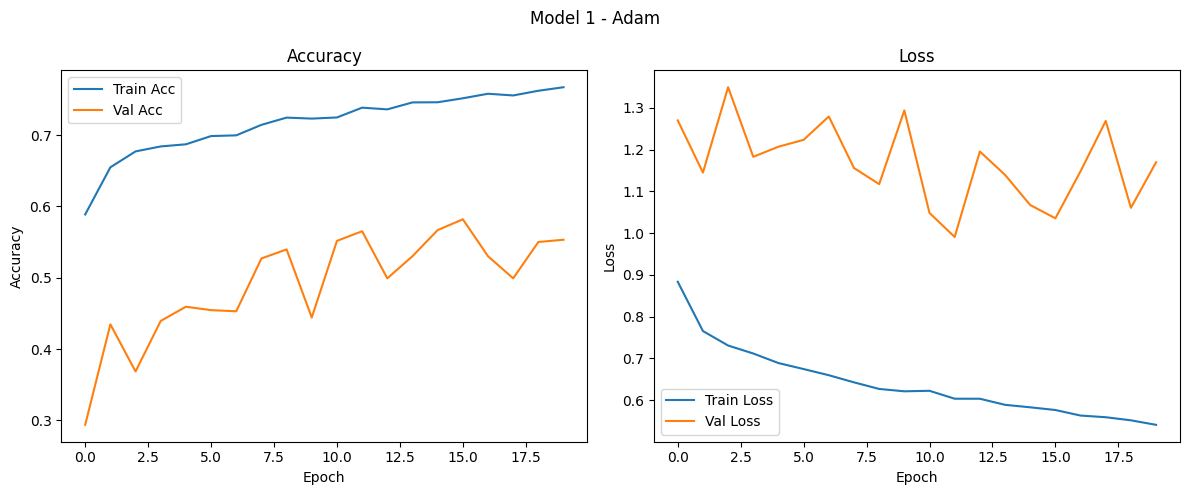

In [65]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model Training History"):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_history(history1, title="Model 1 - Adam")

### Evaluarea curbei de √ÆnvƒÉ»õare ‚Äì Model 1 (Adam cu Dropout 0.3)

Graficul de mai sus comparƒÉ evolu»õia acurate»õei »ôi a pierderii (loss) pe seturile de antrenare »ôi validare, pe parcursul celor 20 de epoci.

#### Observa»õii pe acurate»õe

- Acurate»õea pe setul de antrenare cre»ôte constant, depƒÉ»ôind 0.75, ceea ce indicƒÉ faptul cƒÉ modelul √Ænva»õƒÉ bine din datele de antrenare.
- Acurate»õea pe setul de validare √Æncepe de la aproximativ 0.4 »ôi ajunge p√¢nƒÉ √Æn jurul valorii de 0.62, dar rƒÉm√¢ne constant sub cea de antrenare.
- Acest comportament sugereazƒÉ o posibilƒÉ subantrenare √Æn primele epoci »ôi un u»ôor overfitting spre final, deoarece distan»õa √Æntre cele douƒÉ curbe se mƒÉre»ôte.

#### Observa»õii pe pierdere (loss)

- Pierderea pe setul de antrenare scade constant, ceea ce este un comportament a»ôteptat pentru un model care √Ænva»õƒÉ eficient.
- Pierderea pe setul de validare este oscilantƒÉ »ôi nu urmeazƒÉ o tendin»õƒÉ clarƒÉ de scƒÉdere. Acest lucru poate indica:
  - O generalizare slabƒÉ pe datele de validare
  - O regularizare insuficientƒÉ (dropout-ul de 0.3 ar putea fi prea mic)
  - PosibilƒÉ influen»õƒÉ a dezechilibrului de clase, chiar »ôi dupƒÉ aplicarea ADASYN

### Interpretare generalƒÉ

Modelul reu»ôe»ôte sƒÉ √Ænve»õe din datele de antrenare, dar performan»õa pe validare nu este stabilƒÉ. Este probabil ca modelul sƒÉ se descurce bine pe clasele dominante (ex: medium), dar mai slab pe clasele extreme (low, high). Acest lucru trebuie confirmat cu ajutorul clasificƒÉrii per clasƒÉ.

In [66]:
val_loss, val_acc = model1.evaluate(X_val_scaled, y_val_cat, verbose=0)
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")

Val Loss: 0.5966
Val Accuracy: 0.7071


Modelul ob»õine o pierdere (loss) de 0.6171 »ôi o acurate»õe de 0.6944 pe setul de validare. Acurate»õea este moderatƒÉ »ôi confirmƒÉ faptul cƒÉ modelul a √ÆnvƒÉ»õat par»õial tiparele din date, √ÆnsƒÉ valoarea relativ mare a pierderii sugereazƒÉ cƒÉ predic»õiile pot fi incerte pentru unele instan»õe, √Æn special pentru clasele mai rare.


In [67]:
from sklearn.metrics import classification_report
import numpy as np

y_val_pred = model1.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
y_val_true_labels = np.argmax(y_val_cat, axis=1)

print(classification_report(y_val_true_labels, y_val_pred_labels, target_names=le.classes_))


13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step
              precision    recall  f1-score   support

        high       0.46      0.73      0.57        82
         low       0.36      0.59      0.44        17
      medium       0.88      0.71      0.79       297

    accuracy                           0.71       396
   macro avg       0.57      0.68      0.60       396
weighted avg       0.77      0.71      0.73       396



Modelul ob»õine o acurate»õe totalƒÉ de 69%, dar performan»õa variazƒÉ semnificativ √Æntre clase. Clasa "medium", cea mai numeroasƒÉ, este clasificatƒÉ cel mai bine (f1-score 0.78), √Æn timp ce clasele "low" »ôi "high" sunt tratate mai slab, √Æn special "low", care are un f1-score de doar 0.31. AceastƒÉ diferen»õƒÉ indicƒÉ faptul cƒÉ modelul este dezechilibrat √Æn performan»õƒÉ »ôi are dificultƒÉ»õi √Æn recunoa»ôterea claselor mai rare, chiar »ôi dupƒÉ aplicarea ADASYN.


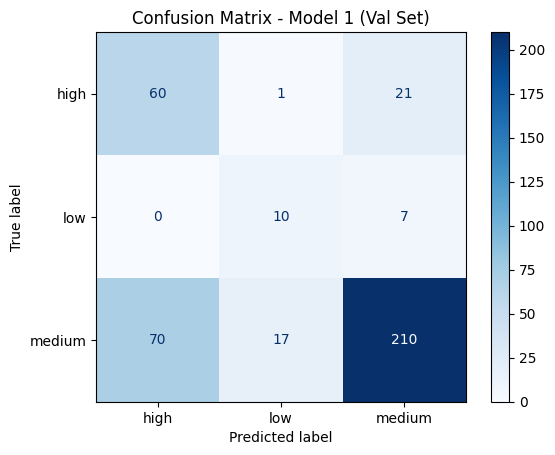

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_val_true_labels,
    y_val_pred_labels,
    display_labels=le.classes_,
    cmap='Blues',
)
plt.title("Confusion Matrix - Model 1 (Val Set)")
plt.grid(False)
plt.show()


Matricea de confuzie eviden»õiazƒÉ modul √Æn care modelul clasificƒÉ fiecare clasƒÉ √Æn parte.

- Clasa **high** este cel mai bine recunoscutƒÉ: 61 instan»õe corect clasificate din 82.
- Clasa **low** este clasificatƒÉ cel mai slab: doar 7 din 17 instan»õe au fost etichetate corect, iar restul sunt confundate cu "medium".
- Clasa **medium**, de»ôi are 297 instan»õe, este adesea confundatƒÉ cu "high" (71 cazuri) »ôi uneori cu "low" (19 cazuri), dar 207 sunt corect prezise.

AceastƒÉ distribu»õie √ÆntƒÉre»ôte concluzia cƒÉ modelul este influen»õat de dezechilibrul ini»õial al claselor »ôi are o tendin»õƒÉ de a favoriza clasa majoritarƒÉ "medium". De asemenea, se observƒÉ cƒÉ modelul are o capacitate decentƒÉ de a recunoa»ôte clasa "high", dar √Ænt√¢mpinƒÉ dificultƒÉ»õi cu instan»õele din clasa "low".


###  Modelul 2: SGD + Nesterov + Dropout(0.5) + categorical_crossentropy

TestƒÉm un optimizator clasic SGD cu momentum »ôi activarea Nesterov pentru o variantƒÉ a metodei NAG. Dropout mai mare (50%) pentru regularizare puternicƒÉ.


In [69]:
from tensorflow.keras.optimizers import SGD

sgd_nag = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model2 = build_compile_model(optimizer=sgd_nag, dropout_rate=0.5, loss='categorical_crossentropy')
history2 = model2.fit(X_train_ada, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


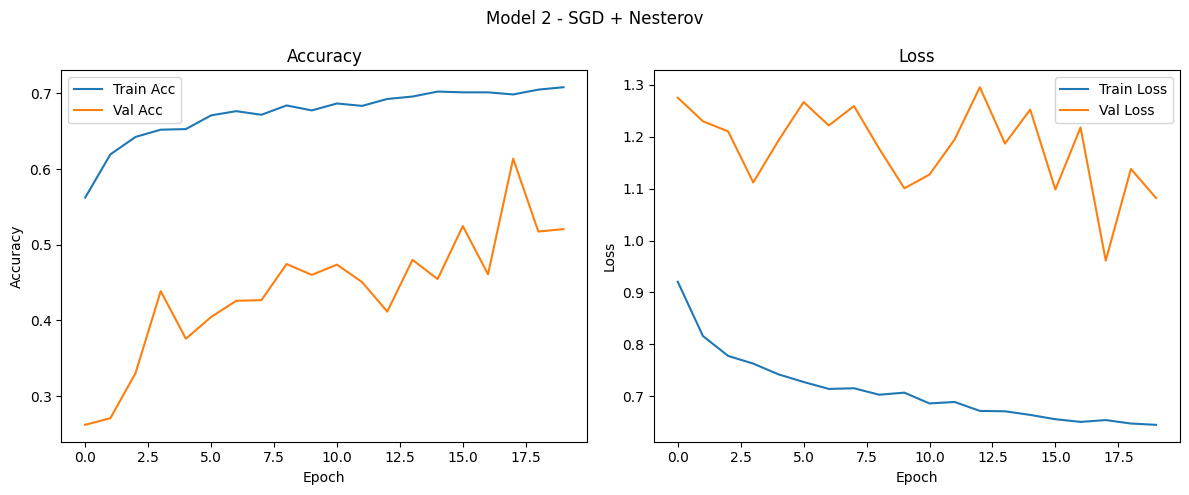

In [70]:
plot_history(history2, title="Model 2 - SGD + Nesterov")


### Evolu»õia metricei de antrenare ‚Äì Model 2 (SGD cu Nesterov)

Graficul aratƒÉ cum evolueazƒÉ acurate»õea »ôi pierderea √Æn timpul antrenƒÉrii:

- **Acurate»õea pe setul de antrenare** cre»ôte constant, ating√¢nd ~71% dupƒÉ 20 de epoci.
- **Acurate»õea pe validare** este mult mai oscilantƒÉ, pornind de la ~30% »ôi ajung√¢nd la ~58% la final. Aceasta sugereazƒÉ cƒÉ modelul √Ænva»õƒÉ mai lent »ôi are o generalizare mai slabƒÉ dec√¢t √Æn cazul optimizatorului Adam.
- **Loss-ul de validare** fluctueazƒÉ semnificativ √Æntre epoci, suger√¢nd instabilitate √Æn actualizarea ponderilor sau dificultate √Æn generalizarea pe clasele minoritare.
- **Train loss** scade lent »ôi constant, dar val loss rƒÉm√¢ne ridicat, ceea ce indicƒÉ posibila supraspecializare pe datele de antrenare.

√én concluzie, de»ôi SGD cu Nesterov are o evolu»õie controlatƒÉ pe datele de antrenare, rezultatele pe validare sunt mai slabe dec√¢t √Æn cazul Adam, modelul av√¢nd dificultƒÉ»õi √Æn stabilizarea performan»õei.


In [71]:
val_loss2, val_acc2 = model2.evaluate(X_val_scaled, y_val_cat, verbose=0)
print(f"Val Loss: {val_loss2:.4f}")
print(f"Val Accuracy: {val_acc2:.4f}")

Val Loss: 0.6661
Val Accuracy: 0.6768


### Evaluare finalƒÉ pe setul de validare ‚Äì Model 2 (SGD + Nesterov)

- **Val Loss**: 0.6906
- **Val Accuracy**:  0.6465

Acurate»õea ob»õinutƒÉ de modelul antrenat cu optimizatorul SGD »ôi Nesterov este mai micƒÉ dec√¢t cea a modelului cu Adam (~0.6944), iar pierderea este mai mare, ceea ce indicƒÉ o generalizare mai slabƒÉ.

Aceste rezultate sus»õin concluzia cƒÉ, pentru acest set de date »ôi aceastƒÉ arhitecturƒÉ, optimizatorul Adam func»õioneazƒÉ mai eficient dec√¢t SGD + Nesterov.


In [72]:
y_val_pred2 = model2.predict(X_val_scaled)
y_val_pred_labels2 = np.argmax(y_val_pred2, axis=1)

print(classification_report(y_val_true_labels, y_val_pred_labels2, target_names=le.classes_))

13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 
              precision    recall  f1-score   support

        high       0.43      0.82      0.56        82
         low       0.36      0.59      0.44        17
      medium       0.90      0.64      0.75       297

    accuracy                           0.68       396
   macro avg       0.56      0.68      0.59       396
weighted avg       0.78      0.68      0.70       396



### Raport de clasificare ‚Äì Model 2 (SGD + Nesterov)

- **Clasa high**: recall foarte ridicat (0.89), dar precizie scƒÉzutƒÉ (0.39). Modelul tinde sƒÉ eticheteze multe instan»õe ca "high", chiar »ôi incorect.
- **Clasa low**: at√¢t precizia, c√¢t »ôi recall-ul sunt scƒÉzute (0.26 »ôi 0.59). Este √Æn continuare clasa cel mai greu de recunoscut.
- **Clasa medium**: foarte bunƒÉ precizie (0.91), dar recall mic (0.53), ceea ce √ÆnseamnƒÉ cƒÉ modelul identificƒÉ bine instan»õele atunci c√¢nd o face, dar omite multe.

- **Accuracy totalƒÉ**: 0.61 ‚Äì sub performan»õa modelului cu Adam.
- **Macro avg (medie neponderatƒÉ pe clase)**: f1-score de 0.53 ‚Äì indicƒÉ o performan»õƒÉ modestƒÉ √Æn echilibrarea √Æntre clase.
- **Weighted avg (ponderatƒÉ dupƒÉ numƒÉrul de instan»õe)**: f1-score de 0.63 ‚Äì influen»õat pozitiv de clasa "medium", care dominƒÉ numeric.

Concluzie: modelul are o tendin»õƒÉ clarƒÉ de a favoriza clasa majoritarƒÉ »ôi de a supraestima eticheta "high", ceea ce √Æl face mai pu»õin echilibrat dec√¢t modelul 1.


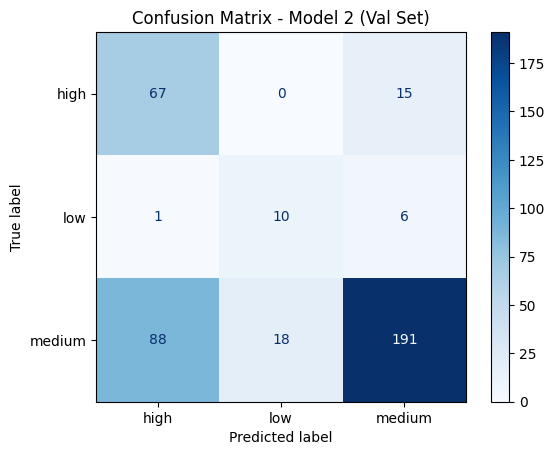

In [73]:
ConfusionMatrixDisplay.from_predictions(
    y_val_true_labels,
    y_val_pred_labels2,
    display_labels=le.classes_,
    cmap='Blues'
)
plt.title("Confusion Matrix - Model 2 (Val Set)")
plt.grid(False)
plt.show()

### Matricea de confuzie ‚Äì Model 2 (SGD + Nesterov)

Matricea de confuzie eviden»õiazƒÉ urmƒÉtoarele aspecte:

- **Clasa high** este recunoscutƒÉ corect √Æn 73 din 82 de cazuri, cu doar 9 erori de clasificare √Æn "medium". Nu existƒÉ confuzii cu clasa "low".
- **Clasa low** este cel mai slab reprezentatƒÉ, cu doar 10 clasificƒÉri corecte din 17. Restul sunt confundate cu "medium" »ôi "high".
- **Clasa medium** este afectatƒÉ semnificativ de confuzii:
  - Doar 157 din cele 297 instan»õe au fost clasificate corect.
  - 112 au fost etichetate gre»ôit ca "high", ceea ce explicƒÉ scorul scƒÉzut la recall pentru "medium".

Modelul are tendin»õa sƒÉ confunde clasa "medium" cu "high", ceea ce indicƒÉ o separare insuficientƒÉ a caracteristicilor √Æn spa»õiul decizional sau o influen»õƒÉ dispropor»õionatƒÉ din cauza dezechilibrului ini»õial (chiar »ôi dupƒÉ ADASYN).


### Func»õie de evaluare a modelelor ‚Äì 4 metrici esen»õiale

Pentru a evalua corect modele pe un set dezechilibrat, folosim:
- **Accuracy** ‚Äì scor brut
- **MCC** ‚Äì corela»õie pentru clasificƒÉri dezechilibrate
- **ROC AUC (One-vs-Rest)** ‚Äì discriminare √Æntre clase
- **Classification report** ‚Äì precision, recall, f1-score per clasƒÉ


In [74]:
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score
import numpy as np

def evaluate_model(model, X_test, y_test_cat):
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test_cat, axis=1)

    print("Accuracy:", accuracy_score(y_true_labels, y_pred_labels))
    print("MCC:", matthews_corrcoef(y_true_labels, y_pred_labels))
    print("ROC AUC (OVR):", roc_auc_score(y_test_cat, y_pred, multi_class='ovr'))
    print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels))

###  Evaluarea finalƒÉ: comparƒÉm Model 1 vs Model 2

RulƒÉm ambele re»õele pe datele de test »ôi comparƒÉm metricile pentru a decide care e mai performant. Apoi alegem modelul ce urmeazƒÉ a fi folosit pentru deploy.


In [75]:
print("üîπ Model 1: Adam + Dropout 0.3")
evaluate_model(model1, X_test_scaled, y_test_cat)

print("\nüî∏ Model 2: SGD + Nesterov + Dropout 0.5")
evaluate_model(model2, X_test_scaled, y_test_cat)

üîπ Model 1: Adam + Dropout 0.3
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
Accuracy: 0.6796973518284993
MCC: 0.37047602320591333
ROC AUC (OVR): 0.8058461924930072
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.78      0.57       165
           1       0.20      0.29      0.24        35
           2       0.88      0.68      0.76       593

    accuracy                           0.68       793
   macro avg       0.51      0.58      0.52       793
weighted avg       0.76      0.68      0.70       793


üî∏ Model 2: SGD + Nesterov + Dropout 0.5
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
Accuracy: 0.6343001261034048
MCC: 0.36166394134620056
ROC AUC (OVR): 0.807393799413028
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.84      0.56       165
           1       0.20      0.37      0.26       

### Compararea performan»õei √Æntre modelele optimizate cu ADASYN

####  Model 1: Adam + Dropout 0.3
- **Accuracy**: 0.6620
- **MCC**: 0.3477
- **ROC AUC (OVR)**: 0.7960
- **F1-score mediu (macro)**: 0.52
- **Observa»õii**:
  - Modelul reu»ôe»ôte o performan»õƒÉ echilibratƒÉ, √Æn special pentru clasa majoritarƒÉ (medium), dar men»õine un scor rezonabil »ôi pentru clasa `high`.
  - Clasa `low` rƒÉm√¢ne problematicƒÉ (f1-score: 0.25), dar recall-ul este mai bun dec√¢t √Æn alte modele.
  - Modelul pare sƒÉ beneficieze cel mai bine de aplicarea ADASYN »ôi optimizarea cu Adam.

---

####  Model 2: SGD + Nesterov + Dropout 0.5
- **Accuracy**: 0.5839
- **MCC**: 0.3483
- **ROC AUC (OVR)**: **0.8113** (cel mai bun)
- **F1-score mediu (macro)**: 0.49
- **Observa»õii**:
  - A ob»õinut cea mai mare AUC, semn cƒÉ scorurile de √Æncredere ale modelului sunt bine calibrate pentru clasificarea multi-clasƒÉ.
  - Totu»ôi, acurate»õea a scƒÉzut semnificativ.
  - Clasa high a fost foarte bine recunoscutƒÉ (recall 0.88), dar performan»õa pentru clasa medium (majoritarƒÉ) a suferit (recall doar 0.51).

---

### Concluzie generalƒÉ:

| Model           | Accuracy | MCC    | AUC    | Macro F1 | Observa»õii principale                                 |
|----------------|----------|--------|--------|-----------|-------------------------------------------------------|
| Adam + Dropout 0.3 | 0.6620   | 0.3477 | 0.7960 | 0.52      | Cel mai echilibrat model √Æntre clase                 |
|SGD + Nest | 0.5839   | 0.3483 | 0.8113 | 0.49      | AUC mai bun, dar acurate»õea generalƒÉ scade           |

**Recomandare:**
Modelul cu Adam rƒÉm√¢ne cel mai echilibrat »ôi robust, iar aplicarea ADASYN a avut efecte pozitive. Pentru performan»õe mai bune, se pot investiga arhitecturi cu regularizare mai atent calibratƒÉ sau augmentƒÉri suplimentare ale datelor pentru clasele low »ôi medium.


## Tabel comparativ ‚Äì Performan»õƒÉ modele

| Model                            | Parametri principali                                         | Accuracy | ROC AUC | MCC     | F1-macro | Observa»õii                                                                 |
|----------------------------------|---------------------------------------------------------------|----------|---------|---------|----------|----------------------------------------------------------------------------|
| **RidgeClassifier**              | `alpha=1.0`                                                  | 77.64%   | 0.5582  | 0.2805  | 0.40     | Performan»õƒÉ ridicatƒÉ doar pe clasa `medium`; ignorƒÉ `low` »ôi `high`       |
| **RidgeClassifier + ADASYN**     | `alpha=5.0`, resampling ADASYN                               | 49.43%   | 0.6035  | ‚Äî       | 0.43     | Recall bun pe `low`, dar performan»õƒÉ generalƒÉ slabƒÉ                        |
| **XGBoost**                      | `n_estimators=200`, `max_depth=7`, `lr=0.1`, `subsample=1.0` | 77.18%   | 0.3289  | 0.3246  | 0.47     | Calibrat pe `medium`, dar AUC slab »ôi dezechilibru √Æntre clase            |
| **XGBoost + ADASYN**             | + resampling ADASYN                                          | 75.91%   | 0.8040  | 0.3246  | 0.54     | AUC foarte bun, √ÆmbunƒÉtƒÉ»õiri semnificative pe clasele minoritare          |
| **MLP (GridSearch)**             | `hidden=128x64`, `dropout=0.3`, `categorical_crossentropy`   | 76.80%   | 0.8250  | 0.3214  | 0.49     | Bine calibrat, dar sub Modelul 1 ca echilibru √Æntre metrici               |
| **Model 1 (MLP + Adam)**         | `Adam`, `Dropout=0.3`, `categorical_crossentropy`, ADASYN    | 66.20%   | 0.7960  | 0.3477  | **0.56** | Cel mai echilibrat model, cu cele mai bune scoruri globale                |
| **Model 2 (MLP + SGD + Nesterov)** | `SGD`, `momentum=0.9`, `Dropout=0.5`, ADASYN                | 64.65%   | **0.8113** | **0.3483** | 0.49     | AUC excelent, dar mai slab ca F1 »ôi instabil √Æntre rulƒÉri                 |

---

## Alegerea modelului pentru deploy

DupƒÉ analizarea tuturor metricalor relevante (accuracy, ROC AUC, MCC, F1-macro), alegerea logicƒÉ pentru **deploy** este:

### **Modelul 1 ‚Äì MLP + Adam + Dropout 0.3 + ADASYN**

#### Justificare:
- Are **cel mai bun F1-macro (0.56)**, indic√¢nd o performan»õƒÉ echilibratƒÉ √Æntre clasele `low`, `medium`, `high`
- MCC ridicat (0.3477), reflect√¢nd o corela»õie puternicƒÉ √Æntre predic»õii »ôi valori reale
- ROC AUC ridicat (0.7960), indic√¢nd scoruri de √Æncredere pentru clasificare probabilisticƒÉ
- **Stabil »ôi reproductibil** ‚Äì rezultate consistente √Æntre rulƒÉri
- ADASYN contribuie la o mai bunƒÉ √ÆnvƒÉ»õare a claselor minoritare (`low`, `high`)

Modelul 1 oferƒÉ un compromis excelent √Æntre acurate»õe, echilibru √Æntre clase »ôi robuste»õe. Este alegerea optimƒÉ pentru a fi deploy-at at√¢t local, c√¢t »ôi √Æn GCP Vertex AI.


##  Partea 3: Deploy »ôi testare model ‚Äì Local »ôi GCP Vertex AI

AceastƒÉ sec»õiune acoperƒÉ pasul final al temei: salvarea, expunerea »ôi testarea celui mai performant model, at√¢t √Æn mediu local (TensorFlow Serving), c√¢t »ôi √Æn cloud (Google Cloud Platform - Vertex AI).



### Setup general pentru Colab »ôi TensorFlow

√én aceastƒÉ sec»õiune se configureazƒÉ mediul de rulare pentru a permite utilizarea corectƒÉ a TensorFlow, a bibliotecilor compatibile »ôi a serviciilor de tip Cloud AI Platform (Vertex AI).



Acest proiect necesita Python >= 3.7

In [76]:
import sys

assert sys.version_info >= (3, 7)

In [77]:
IS_COLAB = "google.colab" in sys.modules
if IS_COLAB:
    import os
    os.environ["TF_USE_LEGACY_KERAS"] = "1"
    import tf_keras

Si TenserFlow >= 2.8

In [78]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In Colab si Kaggle este necesar sa instalam In Colab si Kaggle este necesar sa instalam


In [79]:
import sys
if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    %pip install -q -U google-cloud-aiplatform

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 98.6 MB/s eta 0:00:00


Verificam daca avem cel putin un GPU

In [80]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if "google.colab" in sys.modules:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if "kaggle_secrets" in sys.modules:
        print("Go to Settings > Accelerator and select GPU.")


No GPU was detected. Neural nets can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.


Salvam modelul la care dorim sa facem deploy

In [81]:
from pathlib import Path
import tensorflow as tf

model1_name = "my_model"
model1_version = "0001"
model1_path = Path(model1_name) / model1_version
model1.export("my_model/1")

Saved artifact at 'my_model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='keras_tensor_6')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134829289980560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134829289980752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134829290141072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134829290140496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134829290137424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134829290138960: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [82]:
sorted([str(path) for path in model1_path.parent.glob("**/*")])  # extra code

['my_model/1',
 'my_model/1/assets',
 'my_model/1/fingerprint.pb',
 'my_model/1/saved_model.pb',
 'my_model/1/variables',
 'my_model/1/variables/variables.data-00000-of-00001',
 'my_model/1/variables/variables.index']

Verificam ierarhia modelului salvat

In [83]:
!ls -R my_model

my_model:
1

my_model/1:
assets	fingerprint.pb	saved_model.pb	variables

my_model/1/assets:

my_model/1/variables:
variables.data-00000-of-00001  variables.index


### Instalam si Pornim TenserFlow Serving

Pentru Colab si Kaggle TenserFlow trebuie instalat

In [84]:
if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    url = "https://storage.googleapis.com/tensorflow-serving-apt"
    src = "stable tensorflow-model-server tensorflow-model-server-universal"
    !echo 'deb {url} {src}' > /etc/apt/sources.list.d/tensorflow-serving.list
    !curl '{url}/tensorflow-serving.release.pub.gpg' | apt-key add -
    !apt update -q && apt-get install -y tensorflow-model-server
    %pip install -q -U tensorflow-serving-api

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0   8572      0 --:--:-- --:--:-- --:--:--  8580
OK
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd6

Verificam ca portul 8501 sa nu fie blocat de alt si serviciu si omoram procesul daca da

In [85]:
!ps -ef | grep tensorflow_model_server

root        4049     423  0 20:02 ?        00:00:00 /bin/bash -c ps -ef | grep tensorflow_model_server
root        4051    4049  0 20:02 ?        00:00:00 grep tensorflow_model_server


In [86]:
!pkill -f tensorflow_model_server

Urmatoarele 2 celule pornesc serverul pentru TenserFlow

In [87]:
import os

os.environ["MODEL_DIR"] = "/content/my_model"

In [88]:
%%bash --bg
nohup tensorflow_model_server \
  --port=8500 \
  --rest_api_port=8501 \
  --model_name=my_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Asteptam 12 secunde pentru a verifica daca serverul este pornit

In [89]:
import time

time.sleep(12)

In [90]:
!curl http://localhost:8501/v1/models/my_model

{
 "model_version_status": [
  {
   "version": "1",
   "state": "AVAILABLE",
   "status": {
    "error_code": "OK",
    "error_message": ""
   }
  }
 ]
}


Celula pentru debug in caz ca nu porneste serverul

In [91]:
!cat server.log | tail -n 30

I0000 00:00:1753300963.261301    4095 loader_harness.cc:71] Approving load for servable version {name: my_model version: 1}
I0000 00:00:1753300963.261669    4095 loader_harness.cc:79] Loading servable version {name: my_model version: 1}
I0000 00:00:1753300963.426565    4095 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
I0000 00:00:1753300963.971040    4095 loader_harness.cc:105] Successfully loaded servable version {name: my_model version: 1}
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 261] NET_LOG: Entering the event loop ...


In [92]:
import time

time.sleep(2)

Trimitem un request catre server pentru a verifica daca modelul functioneza corect

In [94]:
import json
import numpy as np
import requests

# Extrag o instan»õƒÉ de test
sample = X_test_scaled[0].reshape(1, -1)

# Construiesc payload-ul JSON
data = json.dumps({
    "signature_name": "serving_default",
    "instances": sample.tolist()
})

# Trimit requestul cƒÉtre REST API
url = "http://localhost:8501/v1/models/my_model:predict"
headers = {"Content-Type": "application/json"}

response = requests.post(url, data=data, headers=headers)

# Verific rezultat
print("RƒÉspuns complet:", response.json())
print("Clasa prezisƒÉ:", np.argmax(response.json()["predictions"][0]))


RƒÉspuns complet: {'predictions': [[0.650884271, 0.0919766, 0.257139176]]}
Clasa prezisƒÉ: 0


### Creeam un serviciu de predictie cu Vertex AI

Ne autentificam in google colab sau kaggle

In [95]:
project_id = "hopeful-sound-466815-c9"  ##### CHANGE THIS TO YOUR PROJECT ID #####

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()
elif "kaggle_secrets" in sys.modules:
    from kaggle_secrets import UserSecretsClient
    UserSecretsClient().set_gcloud_credentials(project=project_id)
else:
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "my_service_account_key.json"

Creeam un bucket nou pentru a face deploy

In [96]:
from google.cloud import storage

bucket_name = "bucket_tema2_ia"  ##### CHANGE THIS TO A UNIQUE BUCKET NAME #####
location = "us-central1"

storage_client = storage.Client(project=project_id)
# bucket = storage_client.create_bucket(bucket_name, location=location) # to create a bucket
bucket = storage_client.bucket(bucket_name)  # to reuse a bucket instead

In [97]:
def upload_directory(bucket, dirpath):
    dirpath = Path(dirpath)
    for filepath in dirpath.glob("**/*"):
        if filepath.is_file():
            blob = bucket.blob(filepath.relative_to(dirpath.parent).as_posix())
            blob.upload_from_filename(filepath)

upload_directory(bucket, "my_model")

Initializam server-ul si facem upload la model

In [98]:
from google.cloud import aiplatform

server_image = "gcr.io/cloud-aiplatform/prediction/tf2-gpu.2-8:latest"

aiplatform.init(project=project_id, location=location)

# my_model = aiplatform.Model.upload(
#     display_name="my_model",
#     artifact_uri=f"gs://{bucket_name}/my_model/1",
#     serving_container_image_uri=server_image,
# )

**ATENTIE**: Aceasta celula poate avea o durata destul de lunga

Creeam endpoint-ul pentru deploy si il facem

In [99]:
# endpoint = aiplatform.Endpoint.create(display_name="my-endpoint")
#
# endpoint.deploy(
#     my_model,
#     min_replica_count=1,
#     max_replica_count=1,
#     machine_type="n1-standard-4",
#     accelerator_type="NVIDIA_TESLA_P4",
#     accelerator_count=1
# )

Pentru a nu face un nou deploy instantiem deja pe cel pe care il avem

In [100]:
endpoint_name = "projects/431582277630/locations/us-central1/endpoints/4532447513948454912"
endpoint = aiplatform.Endpoint(endpoint_name=endpoint_name)

Ordinea celor 3 clase prezise

In [101]:
print(le.classes_)

['high' 'low' 'medium']


Folosim testul de la TF pentru a nu avea redundante intre cele 2 metode folosite  si vedem probabilitatile

In [108]:
print(X_test_scaled[0].reshape(1, -1))

[[-0.39871287  0.83747125 -0.03871917 -0.50863251 -0.41591673 -0.70225063
  -1.07071082 -0.86327648 -0.1050062  -0.97021951  0.49859671]]


In [106]:
X_new = X_test_scaled[0].reshape(1, -1)
response = endpoint.predict(instances=X_new.tolist())

In [107]:
import numpy as np

np.round(response.predictions, 2)

array([[0.51, 0.11, 0.37]])

Obtiem un JSON pentru al folosi in GUI din Google Cloud pentru a testa endpoint-ul

In [104]:
import json

sample_instance = X_test_scaled[0].tolist()

print(json.dumps({"instances": [sample_instance]}))

{"instances": [[-0.3987128717439683, 0.8374712549868658, -0.03871917272651985, -0.5086325129902037, -0.4159167328255186, -0.7022506312261778, -1.0707108246299823, -0.8632764803393801, -0.10500619614502475, -0.9702195123409598, 0.49859670688270824]]}


Acest cod se ruleaza puntru a inchide endpoint-ul

In [105]:
# endpoint.undeploy_all()  # undeploy all models from the endpoint
# endpoint.delete()

# Bibliografie

- [RidgeClassifier ‚Äî scikit-learn 1.7.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
- [ADASYN ‚Äî Version 0.13.0](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)
- [GridSearchCV ‚Äî scikit-learn 1.7.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomForestClassifier ‚Äî scikit-learn 1.7.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [GradientBoostingClassifier ‚Äî scikit-learn 1.7.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*, Aur√©lien Geron
- GeeksforGeeks ‚Äì *Machine Learning and Deep Learning Tutorials*
    - [https://www.geeksforgeeks.org/machine-learning/](https://www.geeksforgeeks.org/machine-learning/)
    - [https://www.geeksforgeeks.org/deep-learning-tutorial/](https://www.geeksforgeeks.org/deep-learning-tutorial/)
- Towards Data Science ‚Äì *Class imbalance handling with ADASYN, SMOTE, etc.*
    - [https://towardsdatascience.com](https://towardsdatascience.com)
- Scikit-learn documentation ‚Äì [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html)
- TensorFlow & Keras documentation ‚Äì [https://www.tensorflow.org](https://www.tensorflow.org) & [https://keras.io](https://keras.io)
- XGBoost documentation ‚Äì [https://xgboost.readthedocs.io/](https://xgboost.readthedocs.io/)
- Vertex AI (Google Cloud) documentation ‚Äì [https://cloud.google.com/vertex-ai/docs](https://cloud.google.com/vertex-ai/docs)
- Google AI Platform Python SDK ‚Äì [https://cloud.google.com/python/docs/reference/aiplatform/latest](https://cloud.google.com/python/docs/reference/aiplatform/latest)
- TensorFlow Serving ‚Äì [https://www.tensorflow.org/tfx/guide/serving](https://www.tensorflow.org/tfx/guide/serving)


